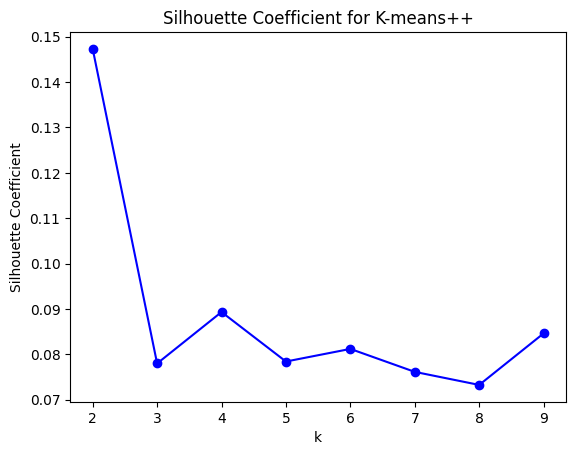

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

def Euclidean(x, y):
    # Compute the Euclidean distance between x and y
    return np.linalg.norm(x - y)

def kmeans_plus_plus(X, k, max_iters=100):
    centroids = [X[random.randint(0, X.shape[0] - 1)]]
    
    for _ in range(1, k):
        distances = np.array([min([np.linalg.norm(x - c)**2 for c in centroids]) for x in X])
        probabilities = distances / np.sum(distances)
        cumulative_probabilities = np.cumsum(probabilities)
        rand_val = random.random()
        new_centroid_index = np.where(cumulative_probabilities >= rand_val)[0][0]
        centroids.append(X[new_centroid_index])
    
    centroids = np.array(centroids)
    
    for i in range(max_iters):
        distances = np.linalg.norm(X[:, None, :] - centroids[None, :, :], axis=2)
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    
    return labels, centroids

def silhouetteCoefficient(data, centroids):
    n = len(data)
    distances = np.zeros((n, len(centroids)))

    for i, point in enumerate(data):
        for j, center in enumerate(centroids):
            distances[i, j] = Euclidean(point, center)

    cluster_assignments = np.argmin(distances, axis=1)
    silhouette = []

    for i in range(n):
        cluster = cluster_assignments[i]
        other_clusters = set(range(len(centroids))) - {cluster}
        same_cluster_points = [j for j in range(n) if cluster_assignments[j] == cluster and i != j]
        if len(same_cluster_points) == 0:
            continue
        avg_same_cluster = np.mean([Euclidean(data[i], data[j]) for j in same_cluster_points])
        avg_other_clusters = [np.mean([Euclidean(data[i], data[j]) for j in range(n) if cluster_assignments[j] == other_cluster]) for other_cluster in other_clusters if len(X[labels == other_cluster]) > 0]
        if not avg_other_clusters:
            continue
        min_avg_other_clusters = np.min(avg_other_clusters)
        silhouette.append((min_avg_other_clusters - avg_same_cluster) / max(avg_same_cluster, min_avg_other_clusters))

    return np.mean(silhouette)

data = []

with open("/Users/siddarthrathinam/Documents/DataMining/dataset", "r") as f:
    lines = f.readlines()

for line in lines:
    parts = line.strip().split(" ")
    data.append([float(x) for x in parts[1:]])

X = np.array(data)

silhouette_scores = []
for k in range(2, 10):  # Start from 2 since K-means needs at least 2 clusters
    labels, _ = kmeans_plus_plus(X, k)
    score = silhouetteCoefficient(X, _)
    silhouette_scores.append(score)

plt.plot(range(2, 10), silhouette_scores, '-bo')
plt.xlabel('k')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Coefficient for K-means++')
plt.show()
